In [4]:
#1.Find the highest rated movie in the “Quest” story type.

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os


In [5]:
plt.rcParams["figure.figsize"] = (20,10)


In [7]:
#Load Data Set 


df = pd.read_csv('HollywoodMovies.csv', delimiter=',')
df


,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.10,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.60,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.50,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.70,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.10,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,The Canyons,IFC,22.0,NaN,NaN,NaN,1.0,0.01,13351.0,0.06,0.14,0.19,NaN,77.21,NaN,2013
966,The Call,TriStar,43.0,66.0,NaN,NaN,2507.0,17.12,6828.0,51.87,16.70,68.57,13.0,527.48,131.69,2013
967,The English Teacher,Cinedigm Entertainment,42.0,NaN,NaN,NaN,2.0,0.01,3001.0,0.10,0.06,0.10,NaN,NaN,NaN,2013
968,John Dies at the End,Magnolia,61.0,53.0,NaN,NaN,1.0,0.01,12467.0,0.14,NaN,0.14,1.0,14.20,1.00,2013


In [14]:
#.Find Rating 

selected_columns = df.loc[:, ["Movie", "AudienceScore", "Story"]]
highest_rated = ""
rating = 0

for i in range(0, 970):
    if selected_columns.loc[i]["Story"] in ("Quest","quest") and selected_columns.loc[i]["AudienceScore"] > rating:
        rating = selected_columns.loc[i]["AudienceScore"]
        highest_rated = selected_columns.loc[i]["Movie"]

print(highest_rated,'-', rating)



Into the Wild - 90.0


In [16]:
#2.Find the genre in which there has been the greatest number of movie releases Genre and number of movies in each Genre

genre = df.loc[:, ["Genre"]]

frequency = dict()
for i in range(0, 970):
    if genre.loc[i][0] in frequency:
        frequency[str(genre.loc[i][0])] += 1
    else:
        frequency[str(genre.loc[i][0])] = 1
print(frequency)


{'Action': 166, 'Animation': 51, 'Adventure': 30, 'Thriller': 35, 'Comedy': 177, 'Musical': 4, 'Drama': 109, 'Biography': 14, 'Horror': 52, 'Romance': 20, 'Fantasy': 6, 'Documentary': 7, 'Crime': 15, 'nan': 1, 'Mystery': 5}


C:\Users\Pavan Jadhav\AppData\Local\Temp\ipykernel_15112\3974039505.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if genre.loc[i][0] in frequency:
C:\Users\Pavan Jadhav\AppData\Local\Temp\ipykernel_15112\3974039505.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequency[str(genre.loc[i][0])] = 1
C:\Users\Pavan Jadhav\AppData\Local\Temp\ipykernel_15112\3974039505.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  freque

In [17]:
#Sort the frequency dictionary based on Values 

frequency_sorted = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

print (frequency_sorted)


#Print the sorted value based on index 

for i in frequency_sorted:
	print(i[0],'-' ,i[1])

#Genre in which there has been the maximum number of movies released

print (frequency_sorted[0])





[('Comedy', 177), ('Action', 166), ('Drama', 109), ('Horror', 52), ('Animation', 51), ('Thriller', 35), ('Adventure', 30), ('Romance', 20), ('Crime', 15), ('Biography', 14), ('Documentary', 7), ('Fantasy', 6), ('Mystery', 5), ('Musical', 4), ('nan', 1)]
Comedy - 177
Action - 166
Drama - 109
Horror - 52
Animation - 51
Thriller - 35
Adventure - 30
Romance - 20
Crime - 15
Biography - 14
Documentary - 7
Fantasy - 6
Mystery - 5
Musical - 4
nan - 1
('Comedy', 177)


In [18]:
#3.Print the names of the top five movies with the costliest budgets.


top5budget = df.sort_values(by='Budget', ascending=False)
top5budget[['Movie','Budget']].head()



,Movie,Budget
3,Pirates of the Caribbean: At World's End,300.0
468,Tangled,260.0
0,Spider-Man 3,258.0
778,The Dark Knight Rises,250.0
241,Harry Potter and the Half-Blood Prince,250.0


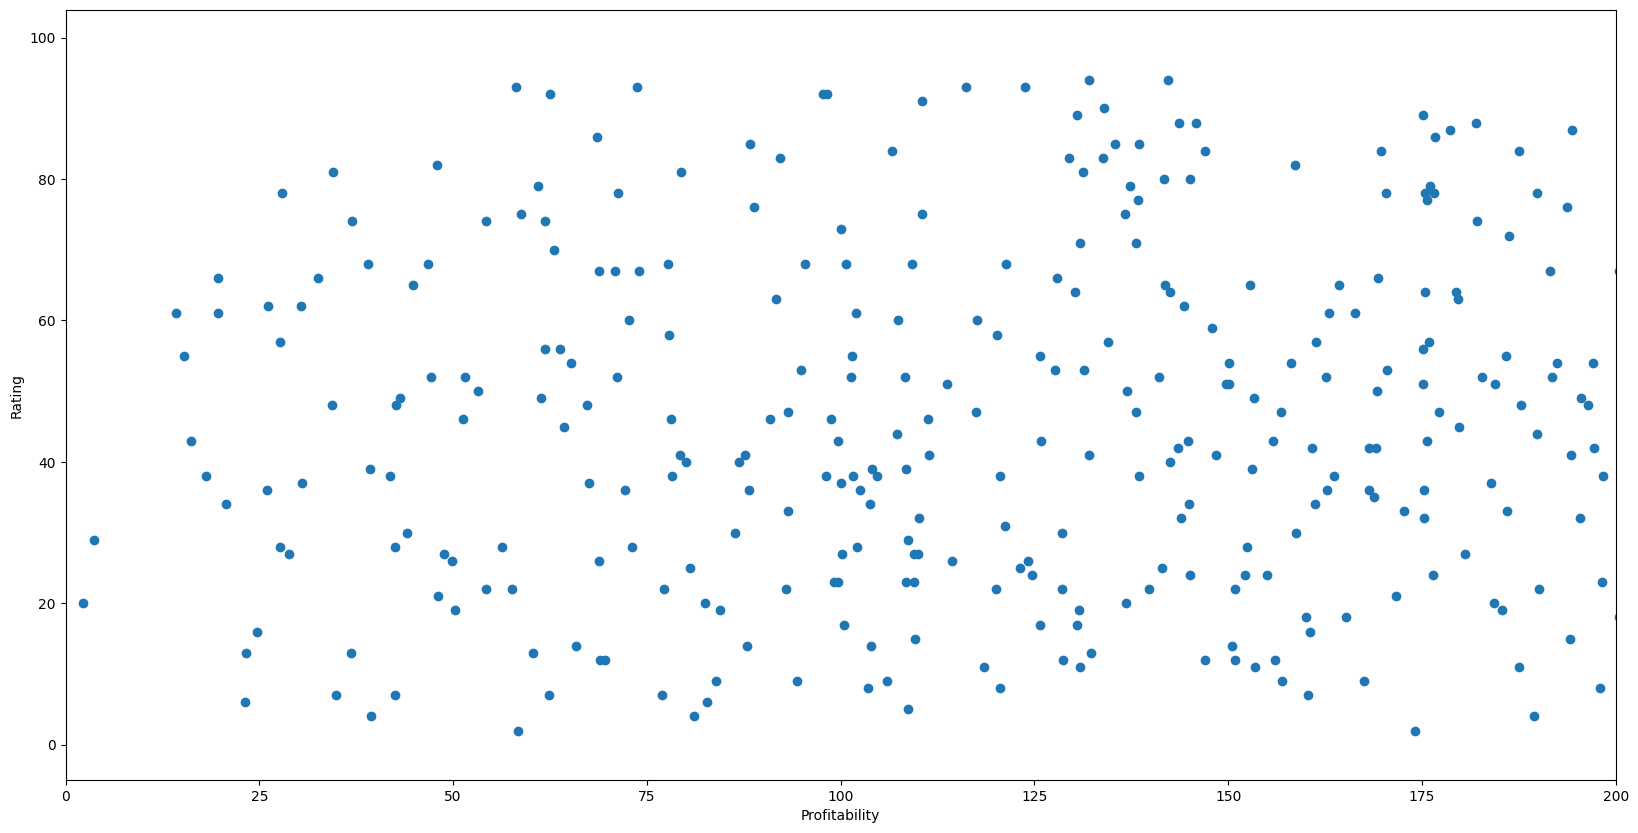

In [19]:
#4.Is there any correspondence between the critics’ evaluation of a movie and its acceptance by the public? Find out, by plotting the net profitability of a movie against the ratings it receives on Rotten Tomatoes.



selected = df.loc[:, ["Profitability", "RottenTomatoes"]]

plt.scatter(selected["Profitability"], selected["RottenTomatoes"])
plt.xlim(0, 200)
plt.xlabel('Profitability')
plt.ylabel('Rating')
plt.show()



In [23]:
#5.1 From the raw data below create a data frame

'''
'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],

'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],

'age': [42, 52, 36, 24, 73],

'preTestScore': [4, 24, 31, ".", "."],

'postTestScore': ["25,000", "94,000", 57, 62, 70]

'''
import pandas as pd

raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
        'age': [42, 52, 36, 24, 73],
        'preTestScore': [4, 24, 31, ".", "."],
        'postTestScore': ["25,000", "94,000", 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
print(df)


  first_name last_name  age preTestScore postTestScore
0      Jason    Miller   42            4        25,000
1      Molly  Jacobson   52           24        94,000
2       Tina         .   36           31            57
3       Jake    Milner   24            .            62
4        Amy     Cooze   73            .            70


In [30]:
#5.25.2: Save the dataframe into a csv file as example.csv

raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
        'age': [42, 52, 36, 24, 73],
        'preTestScore': [4, 24, 31, ".", "."],
        'postTestScore': ["25,000", "94,000", 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df.to_csv('example.csv')




In [31]:
#5.3: Read the example.csv and print the data frame

df = pd.read_csv('example.csv')
print(df)



   Unnamed: 0 first_name last_name  age preTestScore postTestScore
0           0      Jason    Miller   42            4        25,000
1           1      Molly  Jacobson   52           24        94,000
2           2       Tina         .   36           31            57
3           3       Jake    Milner   24            .            62
4           4        Amy     Cooze   73            .            70


In [32]:
#5.4: Read the example.csv without column heading

import pandas as pd
df = pd.read_csv('example.csv', header=None)
print(df)



     0           1          2    3             4              5
0  NaN  first_name  last_name  age  preTestScore  postTestScore
1  0.0       Jason     Miller   42             4         25,000
2  1.0       Molly   Jacobson   52            24         94,000
3  2.0        Tina          .   36            31             57
4  3.0        Jake     Milner   24             .             62
5  4.0         Amy      Cooze   73             .             70


In [37]:
#5.5: Read the example.csv and make the index columns as 'First Name’ and 'Last Name'

df = pd.read_csv('example.csv', index_col=['First Name', 'Last Name'], names=['UID', 'First Name', 'Last Name', 'Age', 'Pre-Test Score', 'Post-Test Score'])
print(df)







                      UID  Age Pre-Test Score Post-Test Score
First Name Last Name                                         
first_name last_name  NaN  age   preTestScore   postTestScore
Jason      Miller     0.0   42              4          25,000
Molly      Jacobson   1.0   52             24          94,000
Tina       .          2.0   36             31              57
Jake       Milner     3.0   24              .              62
Amy        Cooze      4.0   73              .              70


In [34]:
#5.6: Print the data frame in a Boolean form as True or False. True for Null/ NaN values and false for non-null values

df = pd.read_csv('example.csv', na_values=['.'])
print(pd.isnull(df))



   Unnamed: 0  first_name  last_name    age  preTestScore  postTestScore
0       False       False      False  False         False          False
1       False       False      False  False         False          False
2       False       False       True  False         False          False
3       False       False      False  False          True          False
4       False       False      False  False          True          False


In [35]:
#5.7: Read the dataframe by skipping first 3 rows and print the data frame

df = pd.read_csv('example.csv', skiprows=3)
print(df)




   2  Tina       .  36 31  57
0  3  Jake  Milner  24  .  62
1  4   Amy   Cooze  73  .  70


In [36]:
#5.8: Load a csv file while interpreting "," in strings around numbers as thousands seperators. Check the raw data 'postTestScore' column has, as thousands separator. Comma should be ignored while reading the data. It is default behaviour, but you need to give argument to read_csv function which makes sure commas are ignored.

df = pd.read_csv('example.csv',  thousands=',')
print(df)



   Unnamed: 0 first_name last_name  age preTestScore  postTestScore
0           0      Jason    Miller   42            4          25000
1           1      Molly  Jacobson   52           24          94000
2           2       Tina         .   36           31             57
3           3       Jake    Milner   24            .             62
4           4        Amy     Cooze   73            .             70


In [38]:
##6. Perform Operations on Files


In [46]:
#6.1: From the raw data below create a Pandas Series

'Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'


('Amit', 'Bob', 'Kate', 'A', 'b', nan, 'Car', 'dog', 'cat')

In [41]:
#a.Print all elements in lower case

s = pd.Series(['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'])
print(s.str.lower())



0    amit
1     bob
2    kate
3       a
4       b
5     NaN
6     car
7     dog
8     cat
dtype: object


In [42]:
#b.Print all the elements in upper case

s = pd.Series(['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'])
print(s.str.upper())



0    AMIT
1     BOB
2    KATE
3       A
4       B
5     NaN
6     CAR
7     DOG
8     CAT
dtype: object


In [43]:
#c.Print the length of all the elements

s = pd.Series(['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'])
print(s.str.len())

0    4.0
1    3.0
2    4.0
3    1.0
4    1.0
5    NaN
6    3.0
7    3.0
8    3.0
dtype: float64


In [49]:
#6.26.2: From the raw data below create a Pandas Series

' Atul', 'John ', ' jack ', 'Sam'



#Print all elements after stripping spaces from the left and right

s = pd.Index([' Atul', 'John ', ' jack ', 'Sam'])
print(s.str.strip())




Index(['Atul', 'John', 'jack', 'Sam'], dtype='object')


In [53]:
#Print all the elements after removing spaces from the left only

s = pd.Index([' Atul', 'John ', ' jack ', 'Sam'])
print(s.str.lstrip())



Index(['Atul', 'John ', 'jack ', 'Sam'], dtype='object')


In [51]:
#Print all the elements after removing spaces from the right only

s = pd.Index([' Atul', 'John ', ' jack ', 'Sam'])
print(s.str.rstrip())





Index([' Atul', 'John', ' jack', 'Sam'], dtype='object')


In [61]:
#6.3: - Create a series from the raw data below
'India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'

#a.split the individual strings wherever ‘_’ comes and create a list out of it.

s = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])
print(s.str.split('_'))


0           [India, is, big]
1     [Population, is, huge]
2                        NaN
3    [Has, diverse, culture]
dtype: object


In [58]:
#b.Access the 1st Element individual element of a list

s = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])
print(s.str.split('_').str.get(1))


0         is
1         is
2        NaN
3    diverse
dtype: object


In [60]:
#c.Expand the elements so that all individual elements get splitted by ‘_’ and insted of list returns individual elements


s = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])
print(s.str.split('_', expand=True))



            0        1        2
0       India       is      big
1  Population       is     huge
2         NaN      NaN      NaN
3         Has  diverse  culture


In [64]:
#6.4 Create a series 

'A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'

 

import pandas as pd
import numpy as np

s = pd.Series(['A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'])
print (s)
print(s.str.replace('^.a|dog', 'XX-XX ', case=False))


0       A
1       B
2       C
3    AabX
4    BacX
5        
6     NaN
7    CABA
8     dog
9     cat
dtype: object
0       A
1       B
2       C
3    AabX
4    BacX
5        
6     NaN
7    CABA
8     dog
9     cat
dtype: object


In [65]:
#6.5: Create a series and remove dollar from the numeric values '12', '-$10', '$10,000'
d = pd.Series(['12', '-$10', '$10,000'])
print(d.str.replace('$', ''))


0        12
1       -10
2    10,000
dtype: object


In [15]:
#6.6: Create a series and reverse all lower-case words 

import pandas as pd
import numpy as np

pattern = r'\b[a-z]+\b'  
replacement = lambda m: m.group(0)[::-1] if m.group(0) else m.group(0)

s = pd.Series(['india 1998', 'big country', np.nan])

print("Original Series:")
print(s)


s = s.astype(str).replace(pattern, replacement, regex=True)

print("\nSeries after reversing lower-case words:")
print(s)


Original Series:
0     india 1998
1    big country
2            NaN
dtype: object

Series after reversing lower-case words:
0    <function <lambda> at 0x0000025A16BBA200>
1    <function <lambda> at 0x0000025A16BBA200>
2    <function <lambda> at 0x0000025A16BBA200>
dtype: object


In [67]:
#6.7: Create pandas series and print true if value is alphanumeric 

#in series or false if value is not alpha numeric in series.


'1', '2', '1a', '2b', '2003c'
pattern = r'[0-9][a-z]'
print(pd.Series(['1', '2', '1a', '2b', '2003c']).str.contains(pattern))





0    False
1    False
2     True
3     True
4     True
dtype: bool


In [68]:
#6.8: Create pandas series and print true if value is containing ‘A’

'1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'


pattern = r'[0-9][a-z]'

print(pd.Series(['1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c']).str.contains('A', na=False))



0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool


In [70]:
#6.9: Create pandas series and print in three columns value 0 or 1 is a or b or c exists in values

'a', 'a|b', np.nan, 'a|c'

s = pd.Series(['a', 'a|b', np.nan, 'a|c'])
print(s.str.get_dummies(sep='|'))


   a  b  c
0  1  0  0
1  1  1  0
2  0  0  0
3  1  0  1


In [72]:
#6.10: Create pandas dataframe having keys and ltable and rtable as below -
'''
'key': ['One', 'Two'], 'ltable': [1, 2]
'key': ['One', 'Two'], 'rtable': [4, 5]

Merge both the tables based of key
'''
left = pd.DataFrame({'key': ['One', 'Two'], 'ltable': [1, 2]})
right = pd.DataFrame({'key': ['One', 'Two'], 'rtable': [4, 5]})
new=pd.merge(left, right, on='key')
print(new)




   key  ltable  rtable
0  One       1       4
1  Two       2       5
